In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("/content/credit_card_fraud.csv") # import data

In [7]:
df.head() # liat baris awal

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [8]:
df.info() # cek tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [9]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate']) # ubah type data ke date

In [10]:
df.info() # setelah di ubah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionID    100000 non-null  int64         
 1   TransactionDate  100000 non-null  datetime64[ns]
 2   Amount           100000 non-null  float64       
 3   MerchantID       100000 non-null  int64         
 4   TransactionType  100000 non-null  object        
 5   Location         100000 non-null  object        
 6   IsFraud          100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.3+ MB


In [11]:
df.describe() # melihat rata-rata data

,TransactionID,TransactionDate,Amount,MerchantID,IsFraud
count,100000.000000,100000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2024-04-21 13:06:09.973745920,2497.092666,501.676070,0.010000
min,1.000000,2023-10-21 09:28:35.824439,1.050000,1.000000,0.000000
25%,25000.750000,2024-01-20 23:18:20.586056704,1247.955000,252.000000,0.000000
50%,50000.500000,2024-04-21 13:39:35.701438976,2496.500000,503.000000,0.000000
75%,75000.250000,2024-07-21 22:28:05.702624512,3743.592500,753.000000,0.000000
max,100000.000000,2024-10-21 09:20:35.961088,4999.770000,1000.000000,1.000000
std,28867.657797,NaN,1442.415999,288.715868,0.099499


In [12]:
df.duplicated().sum() # cek data duplicated

0

In [13]:
df.isnull().sum() # cek data kosong

,0
TransactionID,0
TransactionDate,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
IsFraud,0


In [14]:
df.isnull().any() # Mengecek apakah ada nilai kosong di DataFrame

,0
TransactionID,False
TransactionDate,False
Amount,False
MerchantID,False
TransactionType,False
Location,False
IsFraud,False


<ipython-input-15-89eb8e6d7118>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_fraud = df.resample('M').sum()['IsFraud']  # Menghitung jumlah transaksi penipuan per bulan


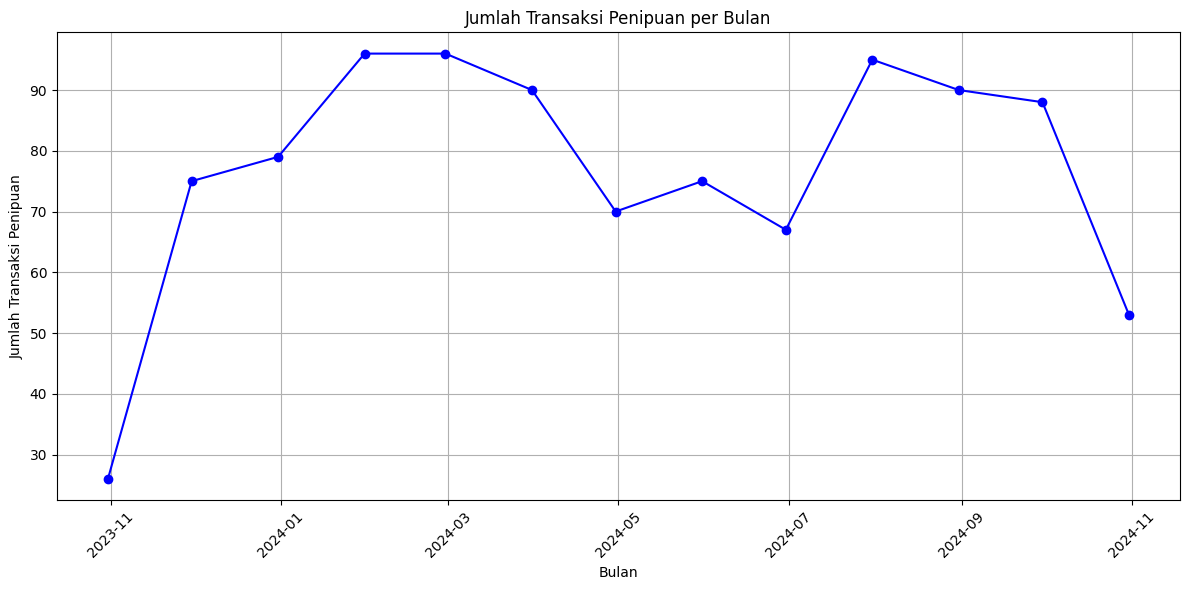

In [15]:
df_monthly= df
df_monthly['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df_monthly['IsFraud'] = df['IsFraud']

# Mengatur kolom 'TransactionDate' sebagai index
df_monthly.set_index('TransactionDate', inplace=True)

# Melakukan Resampling per Bulan dan Menghitung Jumlah Transaksi Penipuan
monthly_fraud = df.resample('M').sum()['IsFraud']  # Menghitung jumlah transaksi penipuan per bulan


plt.figure(figsize=(12, 6))
plt.plot(monthly_fraud.index, monthly_fraud, marker='o', linestyle='-', color='b')  # Plot data
plt.title('Jumlah Transaksi Penipuan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi Penipuan')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()  # Menampilkan plot

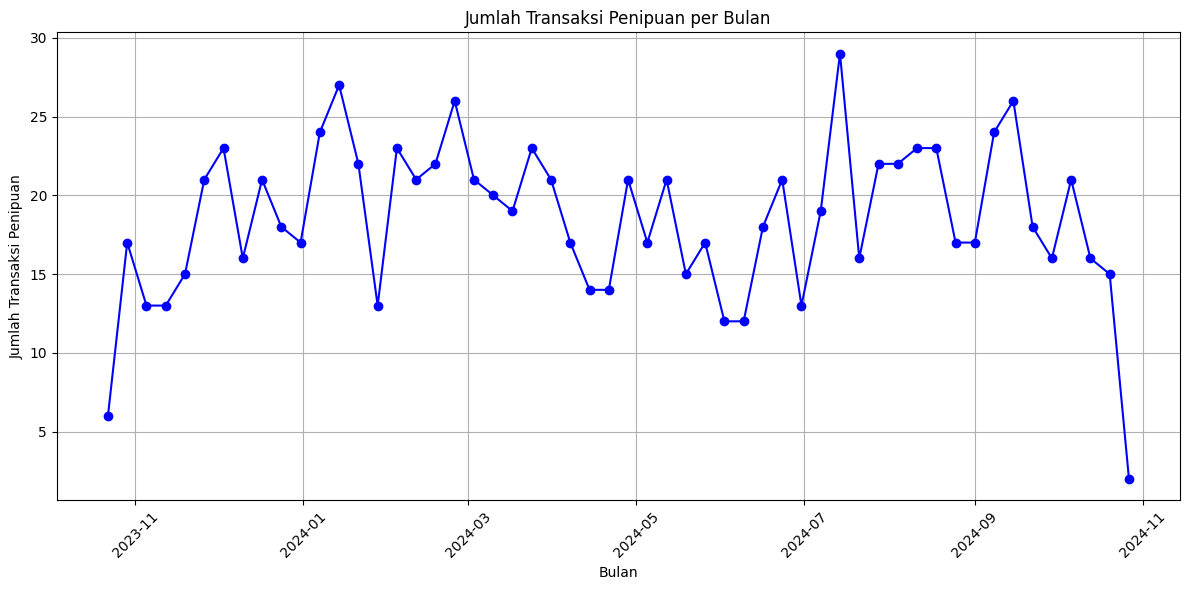

In [16]:
df_weekly = df
df_weekly['IsFraud'] = df['IsFraud']

# Mengatur kolom 'TransactionDate' sebagai index
# df_weekly.set_index('TransactionDate', inplace=True)

# Melakukan Resampling per Bulan dan Menghitung Jumlah Transaksi Penipuan
weekly_fraud = df.resample('W').sum()['IsFraud']  # Menghitung jumlah transaksi penipuan per bulan


plt.figure(figsize=(12, 6))
plt.plot(weekly_fraud.index, weekly_fraud, marker='o', linestyle='-', color='b')  # Plot data
plt.title('Jumlah Transaksi Penipuan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi Penipuan')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()  # Menampilkan plot

In [17]:
# dari grafik di atas saya mendapat kesimpulan yang cukup jelas ya tema-teman.
# yaitu, penipu menipu kita dengan tipuan yang menipu tidak kenal waktu
# jadi kita harus berhati-hati terhadap penipu yang menipu dan kenal waktu untuk menipu

In [18]:
# rata-rata di setiap bulan ada sekitar 15 - 20 kasus yang terjadi secara acak

In [19]:
# Next

In [20]:
df.shape # liat baris dulu la biar ga capek

(100000, 6)

In [24]:
df['TransactionType'].unique() # lah cuma 2 kocak

array(['refund', 'purchase'], dtype=object)

In [21]:
fraud_df = df[df['IsFraud'] == 1]


In [22]:
fraud_count_by_type = fraud_df.groupby('TransactionType')['IsFraud'].count()

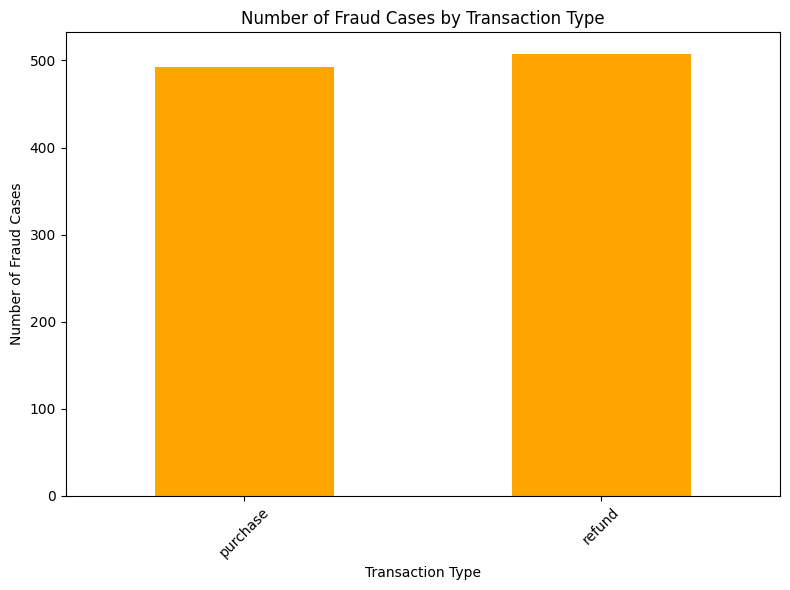

In [23]:
plt.figure(figsize=(8, 6))
fraud_count_by_type.plot(kind='bar', color='orange')
plt.title('Number of Fraud Cases by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.tight_layout()

In [26]:
fraud_count_by_type.head()

,IsFraud
TransactionType,
purchase,493
refund,507


In [27]:
# dari data barusan yang cuma 2 doang kocak
# kasus pemipuan lebih sering terjadi pada transaksi berjenis refund

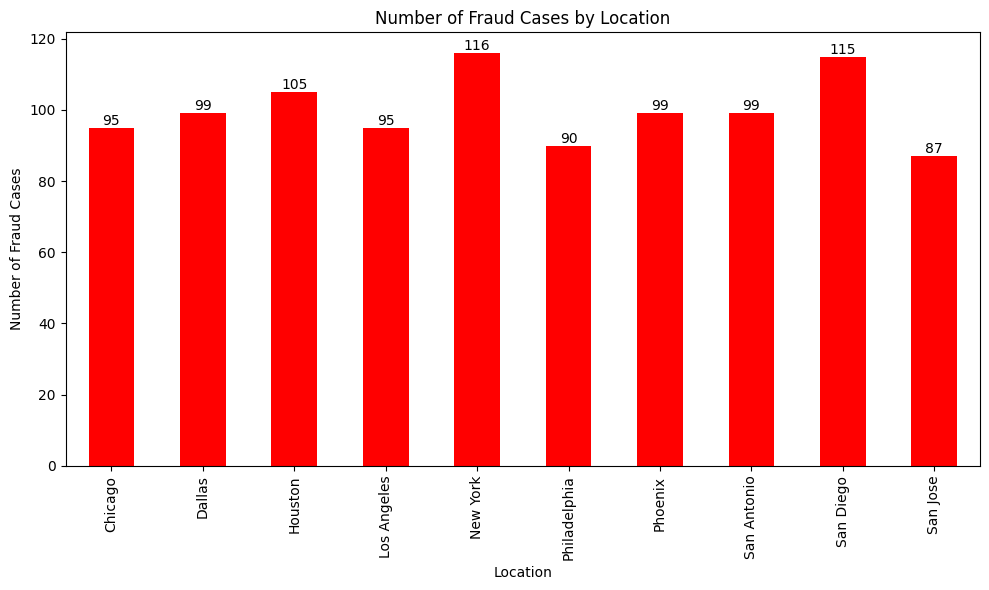

In [30]:
df_fraud = df[df['IsFraud'] == 1]
fraud_count_by_location = df_fraud.groupby('Location')['IsFraud'].count()
plt.figure(figsize=(10, 6))
fraud_count_by_location.plot(kind='bar', color='red')
plt.title('Number of Fraud Cases by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=90)
plt.tight_layout()
for index, value in enumerate(fraud_count_by_location):
    plt.text(index, value, str(value), ha='center', va='bottom')